<a href="https://colab.research.google.com/github/RaviGprec/Machine-Learning/blob/master/Recurssive_feature_Elimination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import RFE

dataset = datasets.load_breast_cancer()

X =  dataset.data

In [3]:
X.shape


(569, 30)

In [0]:
Y = dataset.target

In [6]:
Y.shape

(569,)

In [0]:
from sklearn.model_selection import train_test_split

X,x_test,Y,y_test = train_test_split(X,Y, test_size= 0.3,train_size=0.7)

In [0]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state= 40)

In [13]:
rfc.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=40, verbose=0, warm_start=False)

In [14]:
rfc.predict(x_test)

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns

In [17]:
print(accuracy_score(y_test, rfc.predict(x_test)))

0.9415204678362573


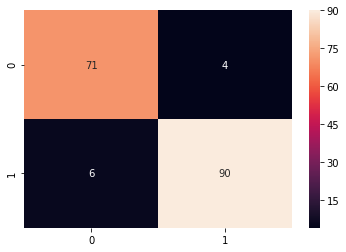

In [20]:
cm = confusion_matrix(y_test,rfc.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

## Recursive feature elimination (RFE) with random forest


In [0]:
#converting numpy array to pandas dataframe

X = pd.DataFrame.from_records(X)

In [0]:
from sklearn.feature_selection import RFE
rfe  = RFE(estimator=rfc,n_features_to_select=5,step=1)
rfe  = rfe.fit(X,Y)


In [27]:
print("Chosen best 5 features using RFE: ", X.columns[rfe.support_])

Chosen best 5 features using RFE:  Int64Index([7, 20, 22, 23, 27], dtype='int64')


Chosen 5 best features by rfe are column numbers [7,20,22,23,27]. Lets see how many feature we need to use with rfecv method.

## Recursive feature elimination with cross validation and random forest classification

Now we will not only find best features but we also find how many features do we need for best accuracy.

In [0]:
from sklearn.feature_selection import RFECV
rfecv  = RFECV(estimator=rfc,cv=5,step=1,scoring = "accuracy")
rfecv  = rfecv.fit(X,Y)


In [31]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])

Optimal number of features : 30
Best features : Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
           dtype='int64')


It is surprising that optimal number of features are "all the features ". Let see the graph between accuracy and no.features

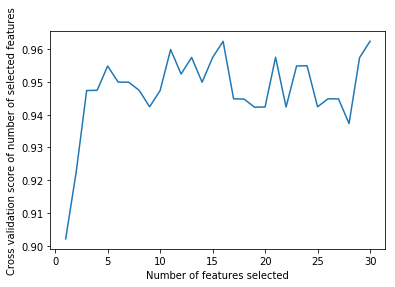

In [32]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

We can also try another method for feature selction 

## Tree based feature selection and random forest classification


http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html In random forest classification method there is a featureimportances attributes that is the** feature importances** (the higher, the more important the feature). !!! To use** feature_importance** method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 7 (0.234912)
2. feature 22 (0.169631)
3. feature 27 (0.104029)
4. feature 3 (0.086136)
5. feature 20 (0.070706)
6. feature 6 (0.067806)
7. feature 0 (0.065680)
8. feature 21 (0.034203)
9. feature 25 (0.028903)
10. feature 29 (0.020916)
11. feature 10 (0.014845)
12. feature 28 (0.012941)
13. feature 23 (0.012350)
14. feature 13 (0.009834)
15. feature 14 (0.009067)
16. feature 4 (0.008642)
17. feature 19 (0.007963)
18. feature 26 (0.007671)
19. feature 24 (0.007058)
20. feature 17 (0.004683)
21. feature 16 (0.004441)
22. feature 12 (0.004267)
23. feature 2 (0.004058)
24. feature 8 (0.003226)
25. feature 18 (0.002521)
26. feature 9 (0.001015)
27. feature 15 (0.000944)
28. feature 5 (0.000792)
29. feature 11 (0.000737)
30. feature 1 (0.000024)


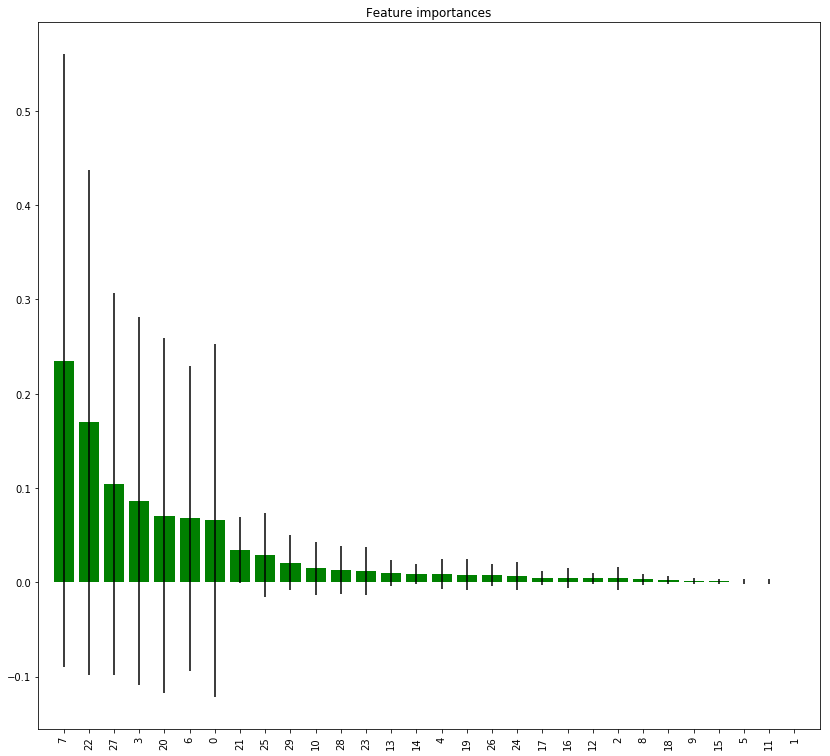

In [35]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X,Y)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()